# CLUSTERING THE MILITARY POWERS OF COUNTRIES

In [45]:
# cluserinng conturies with their military powers

In [46]:
# libraries

In [47]:
!pip install pycaret

In [48]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from pycaret.clustering import*
import joblib

### EDA

In [49]:
#read the data

In [50]:
df=pd.read_excel("World military power (1).xlsx")

In [51]:
#EDA

In [52]:
# see first 5 cells

In [53]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [54]:
#fix data reading

In [55]:
#take first colon and make it header

In [56]:
df.columns = df.iloc[0]

In [57]:
#remove first cell

In [58]:
df.drop(0,inplace=True)

In [59]:
#see data shape

In [60]:
df.shape

(138, 60)

In [61]:
#see information from data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength                        138 non-null    object
 3   Aircraft Strength value                  138 non-null    object
 4   Fighter/Interceptor Strength             138 non-null    object
 5   Fighter/Interceptor Strength value       138 non-null    object
 6   Attack Aircraft Strength                 138 non-null    object
 7   Attack Aircraft Strength value           138 non-null    object
 8   Transport Aircraft Fleet Strength        138 non-null    object
 9   Transport Aircraft Fleet Strength value  138 non-null    object
 10  Trainer Aircraft Fleet                   138 non-null    objec

In [63]:
# see statisticcs about data

In [64]:
df.describe().T.round(2)

,count,unique,top,freq
0,,,,
Military Strength,138,138,Afghanistan,1
Military Strength Power Index,138.0,138.0,1.3444,1.0
Aircraft Strength,138,138,Afghanistan,1
Aircraft Strength value,138,113,19,5
Fighter/Interceptor Strength,138,138,Afghanistan,1
Fighter/Interceptor Strength value,138,63,0,46
Attack Aircraft Strength,138,138,Afghanistan,1
Attack Aircraft Strength value,138,38,0,75
Transport Aircraft Fleet Strength,138,138,Afghanistan,1


In [65]:
# see the corelaitons belong to data

In [66]:
df.corr()

""
0


In [67]:
# see datas columns names

In [68]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [69]:
#see noen values

In [70]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strengt

In [71]:
# ampute with 0 becaus ewe know from job knowing

In [72]:
df = df.fillna(0)

### modeling

In [ ]:
# turn object colons into numeric

In [75]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
# setup model

In [76]:
setup(df_dummies)

,Description,Value
0,Session id,7845
1,Original data shape,"(138, 5129)"
2,Transformed data shape,"(138, 5129)"
3,Numeric features,5129
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# create model

In [77]:
kmeans = create_model('kmeans', 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4811,194.5403,0.6889,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# crearte drawing

In [78]:
plot_model(kmeans)

In [ ]:
# draw elbow methode

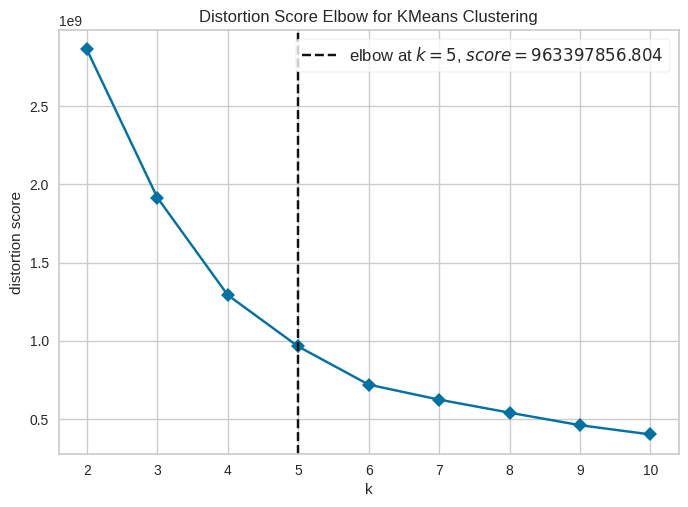

In [79]:
plot_model(kmeans, plot='elbow')

In [ ]:
#  model tuning

In [81]:
kmeans = create_model('kmeans', 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4793,205.6261,0.5701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]